# Problem Statement

In this Linear Machine Learning model, We'll work on cars dataset which consists of all hardware specifications of differents cars.

we are going to predict Miles per Gallon(MPG) of the cars with some indipendent variables from the dataset.

# Importing Libraries

In [1]:
#  Importing libraries for exploratory Data Analysis

import pandas as pd
import numpy as np

#  Importing libraries for Data Visualization

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#  importing Data 
cars = pd.read_csv("cars.csv")

In [3]:
#checking data set shape
print(cars.shape)

(32, 12)


In [6]:
cars.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Model       32 non-null object
MPG         32 non-null float64
Cylinder    32 non-null int64
Disp        29 non-null float64
HP          29 non-null float64
Drat        32 non-null float64
Wt          32 non-null float64
Qsec        32 non-null float64
VS          32 non-null int64
AM          32 non-null int64
Gear        32 non-null int64
Carb        32 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 3.1+ KB


# Exploratory Data Analysis

In [8]:
#checking for null values in data set
cars.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        3
HP          3
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

In [10]:
cars.describe()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
count,32.000000,32.000000,29.000000,29.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,229.789655,145.206897,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,129.299092,71.434975,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.300000,95.000000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,167.600000,113.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,350.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [12]:
#  replacing the  null values with mean value
cars = cars.fillna(cars.mean())

In [13]:
cars.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

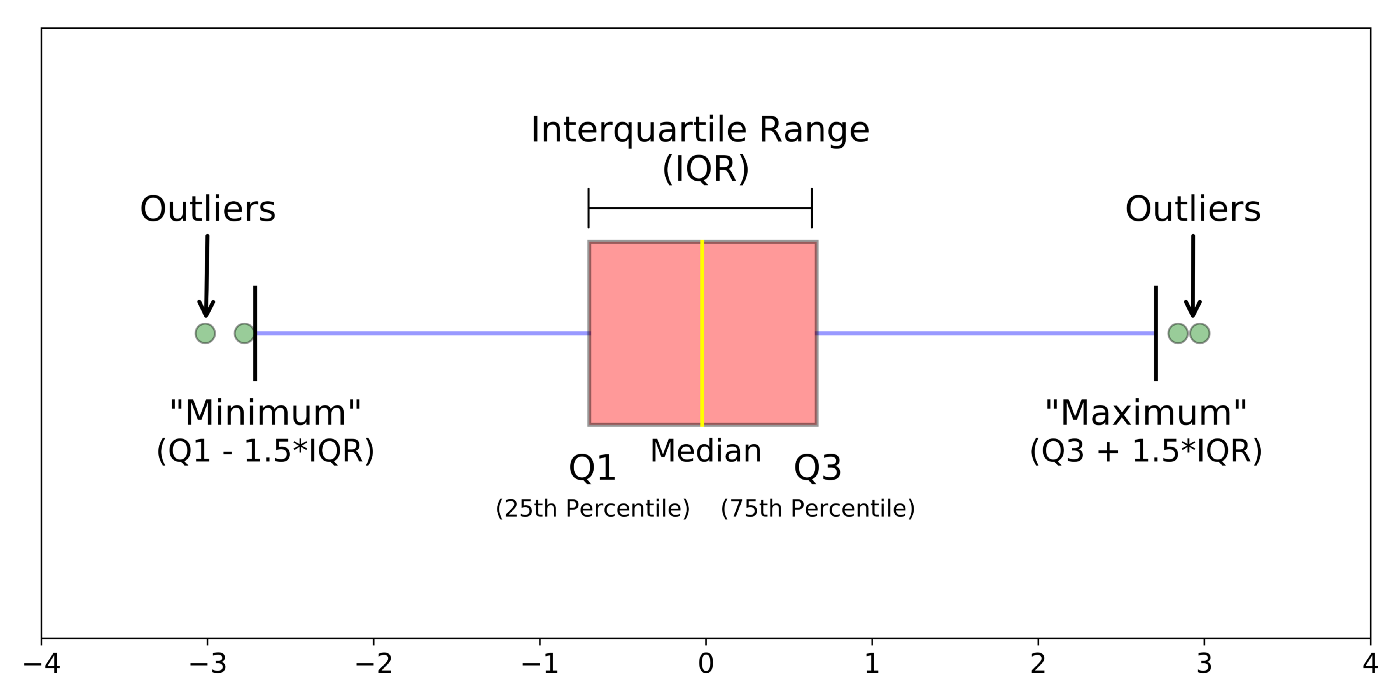

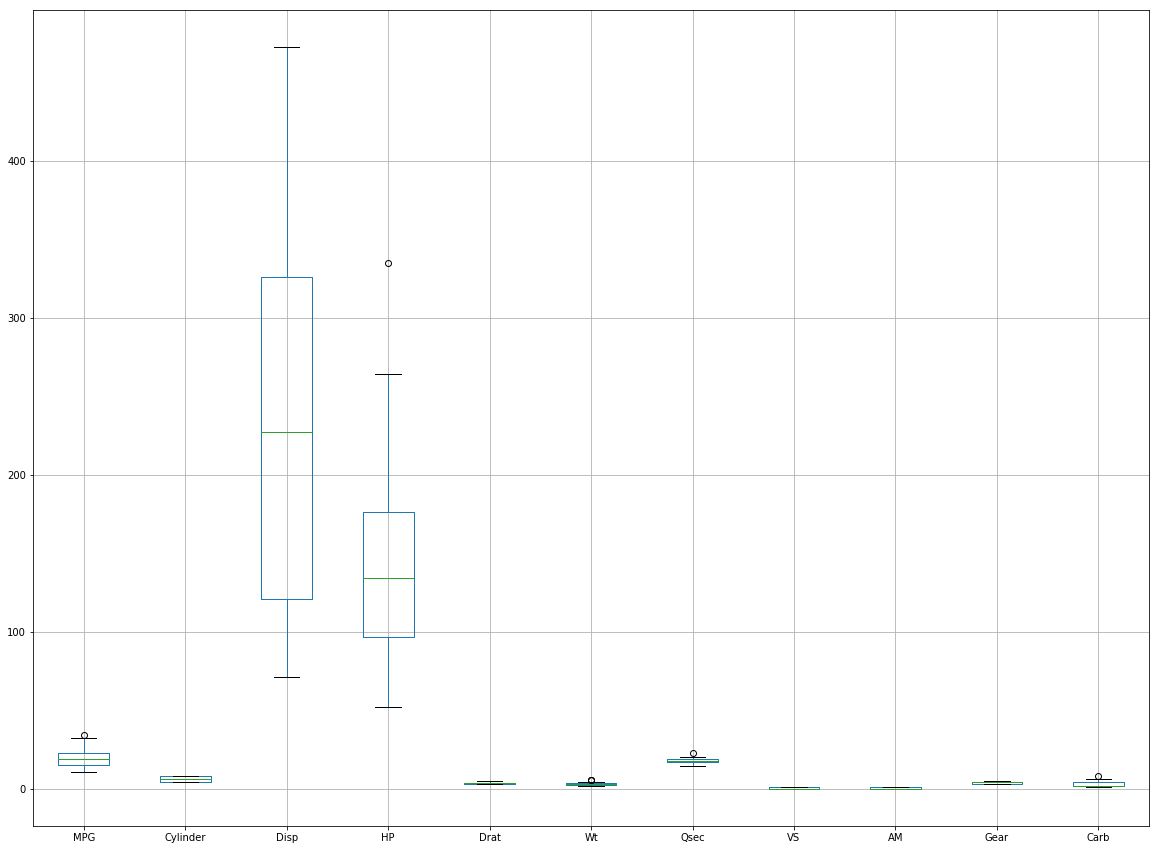

In [14]:
cars.boxplot(figsize=(20,15))
plt.show()

In [18]:
cars.corr()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
MPG,1.000000,-0.852162,-0.844253,-0.764345,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
Cylinder,-0.852162,1.000000,0.883549,0.806028,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
Disp,-0.844253,0.883549,1.000000,0.781902,-0.682647,0.882466,-0.428585,-0.677328,-0.589928,-0.530916,0.407567
HP,-0.764345,0.806028,0.781902,1.000000,-0.414259,0.649502,-0.711671,-0.689782,-0.227285,-0.091671,0.761158
Drat,0.681172,-0.699938,-0.682647,-0.414259,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
Wt,-0.867659,0.782496,0.882466,0.649502,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
Qsec,0.418684,-0.591242,-0.428585,-0.711671,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
VS,0.664039,-0.810812,-0.677328,-0.689782,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
AM,0.599832,-0.522607,-0.589928,-0.227285,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
Gear,0.480285,-0.492687,-0.530916,-0.091671,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


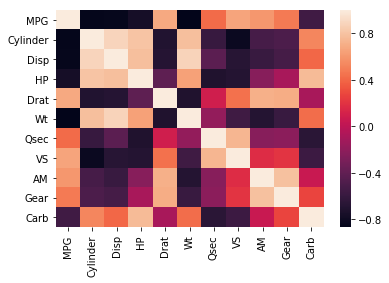

In [15]:
sb.heatmap(cars.corr())

In [16]:
cars.corr()
#HFM | Consolidation Standards | FCCS | HFM Standards | FCCS Stan

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
MPG,1.000000,-0.852162,-0.844253,-0.764345,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
Cylinder,-0.852162,1.000000,0.883549,0.806028,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
Disp,-0.844253,0.883549,1.000000,0.781902,-0.682647,0.882466,-0.428585,-0.677328,-0.589928,-0.530916,0.407567
HP,-0.764345,0.806028,0.781902,1.000000,-0.414259,0.649502,-0.711671,-0.689782,-0.227285,-0.091671,0.761158
Drat,0.681172,-0.699938,-0.682647,-0.414259,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
Wt,-0.867659,0.782496,0.882466,0.649502,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
Qsec,0.418684,-0.591242,-0.428585,-0.711671,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
VS,0.664039,-0.810812,-0.677328,-0.689782,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
AM,0.599832,-0.522607,-0.589928,-0.227285,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
Gear,0.480285,-0.492687,-0.530916,-0.091671,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


Range of Skewness, S < |1.96|
Skewness of hp:  0.8444142994364577
Skewness of wt:  0.44378553550607736
Kurtosis of hp:  0.2424939159880557
Kurtosis of wt:  0.1724705401587343


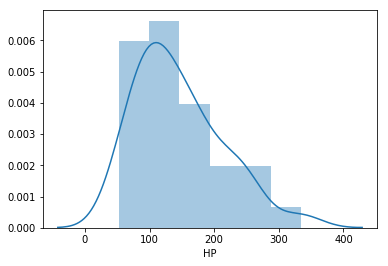

In [17]:
from scipy import stats

sb.distplot(cars.HP)
print("Range of Skewness, S < |1.96|")

print("Skewness of hp: ",stats.skew(cars.HP))
print("Skewness of wt: ",stats.skew(cars.Wt))


print("Kurtosis of hp: ",stats.kurtosis(cars.HP))
print("Kurtosis of wt: ",stats.kurtosis(cars.Wt))

#both HP and Wt passing normality test, they are normal values coming between the range of -1.96 to + 1.96

In [19]:
X = cars.loc[:,['HP','Wt','AM']]
y = cars.MPG


In [20]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=100)

In [22]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (25, 3)
X_test shape (7, 3)
y_train shape (25,)
y_test shape (7,)


In [23]:
# Importing machine learning algorithm
from sklearn.linear_model import LinearRegression

help(LinearRegression)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_predict = model.predict(X_test)

In [27]:
# Model evaluation 
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics

In [28]:
r2_score(y_test,y_predict)

0.8027724896732765

In [29]:
y_test

13    15.2
28    15.8
1     21.0
26    26.0
5     18.1
18    30.4
29    19.7
Name: MPG, dtype: float64

In [30]:
y_predict

array([17.83342644, 17.94649606, 24.46669923, 27.1438531 , 20.18709086,
       30.00214964, 22.32990964])

In [ ]:
predictions = model_lr.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Data Cleaning

In [ ]:
#Outlier analsis
cars.HP.plot(kind="box")

In [ ]:
cars[cars.HP==cars.HP.max()]

In [ ]:
cars_final = cars.drop(index=30)

In [ ]:
cars_final

In [ ]:
X = cars_final.loc[:,['HP','Wt','AM']]
y = cars_final.MPG
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=14)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_predict = model_lr.predict(X_test)
r2_score(y_test,y_predict)

In [ ]:
y_test

In [ ]:
y_predict

In [ ]:
# print the intercept
print(model_lr.intercept_)

In [ ]:
predictions = model_lr.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
# Model evaluation 
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
sb.regplot(x = "HP", y = "MPG", data = cars)